In [20]:
#pytorch related imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split,Dataset

In [102]:
#other imports
import pandas as pd
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [98]:
dataSetPath = '../Datasets/Dataset1/Respiratory_Sound_Database/Respiratory_Sound_Database'


In [58]:
patient_data=pd.read_csv(dataSetPath+ "/patient_diagnosis.csv",names=['pid','disease'])
patient_data.head()



pid  disease
0  101     URTI
1  102  Healthy
2  103   Asthma
3  104     COPD
4  105     URTI

COPD


e:\conda\envs\pyt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

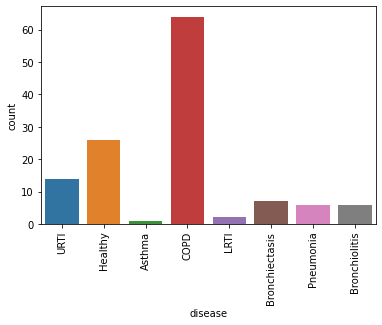

In [25]:
sns.countplot(patient_data.disease)
plt.xticks(rotation=90)

In [137]:
#Label Encorder

from numpy import array
from numpy import argmax
disease_labels = array(["Asthma","COPD","Bronchiectasis","Pneumonia","URTI","Healthy","Bronchiolitis","LRTI"])

le = preprocessing.LabelBinarizer()
# i_labels = le.fit_transform(disease_labels)
# oneHotLabels = to_categorical(i_labels)
# # print(oneHotLabels[:10])
encodedLabels = le.fit_transform(disease_labels)
# features = np.reshape(features,(*features.shape,1))



print(encodedLabels)


print(le.transform (["COPD"]))





[[1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]]
[[0 0 0 1 0 0 0 0]]


In [141]:
ex = np.array([1,0,0,0,0,0,0,0])
yx = np.argmax(ex, axis=0)
print(le.inverse_transform(yx))


AxisError: axis 1 is out of bounds for array of dimension 1

In [146]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ["Asthma","COPD","Bronchiectasis","Pneumonia","URTI","Healthy","Bronchiolitis","LRTI"]
values = array(data)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[4])])

def EncodeOneHot(x):
    return onehot_encoder.transform([label_encoder.transform([x])])

def DecodeOneHot(lst =[]):
    return label_encoder.inverse_transform([argmax(lst)])

['Asthma' 'COPD' 'Bronchiectasis' 'Pneumonia' 'URTI' 'Healthy'
 'Bronchiolitis' 'LRTI']
[0 3 1 6 7 4 2 5]
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]
['URTI']
[[0. 0. 0. 0. 1. 0. 0. 0.]]


In [153]:
EncodeOneHot('Pneumonia')

array([[0., 0., 0., 0., 0., 0., 1., 0.]])

In [164]:
l = [0, 0, 1, 0, 0, 0, 0, 0]
DecodeOneHot(l)

array(['Bronchiolitis'], dtype='<U14')

In [165]:
class LungSoundDataSet(Dataset):
    def __init__(self,patient_data_labels, data_file_path):
        self.patient_data_labels = patient_data_labels
        self.data_file_path = data_file_path
        self.audioFiles =[]
        for file in os.listdir(data_file_path):
            if file.endswith('.wav'):
                self.audioFiles.append (file)

    def __getitem__(self, index):
        # get correct label
        pid = int(self.audioFiles[index].split('_')[0])             # get pid from file name
        labelPd = patient_data[patient_data['pid'] == pid]          # find correct row
        label = labelPd.iat[0,1]                                    # extract label
        encodedLabel = EncodeOneHot(label)
        return self.audioFiles[index],encodedLabel

   
        
    def __len__(self):
        return len(self.audioFiles)

In [166]:
train_set = LungSoundDataSet(patient_data,dataSetPath + '/audio_and_txt_files')

In [167]:
print(len(train_set))
train_set.__getitem__(0)

920


('101_1b1_Al_sc_Meditron.wav', array([[0., 0., 0., 0., 0., 0., 0., 1.]]))